In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

## Data Exploring

In [2]:
df = pd.read_csv("car_price_prediction.csv")

***Import Data***

***(From Kaggle :"https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge")***

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


***Explore Data***

***1. ID doesn't use***

***2. 'Levy' has unlogic value '-'***

***3. 'Mileage', 'Engine volume' can change to number***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

***Explore Data information***

***1. Data has number and object type***

***2. Non-null data***



In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


***Explore statistic of Data***

***1. Has outlier (eg. max value of Airbags > 3std of Airbags)***


In [6]:
df.duplicated().sum()

313

***Explore duplicates data***

***1. There are 313 duplicates in data***


In [7]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

***'Levy' has unlogic value '-'***



In [8]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

***'Mileage' need to remove 'km'***

In [9]:
df['Engine volume'].value_counts() 

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

***'Engine volume' some value has a not numeric***

In [10]:
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

***04-May should be 4-5***
***02-Mar should be 2-3***

## Data Cleaning

In [11]:
df.drop(columns=["ID"], inplace=True)

***Drop ID feature***

In [12]:
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

***Convert 'Levy' column to numeric (nan if error)***

In [13]:
df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]
df['Engine volume'] = [float(value.split(' ')[0]) for value in df['Engine volume']]

***Remove unnumberic in data from 'Mileage' and 'Engine volume' column***

In [14]:
df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

***Convert (02-Mar to 2-3) and (04-May to 4-5)***

## Exploring Data Analysis

<AxesSubplot: xlabel='Levy', ylabel='Price'>

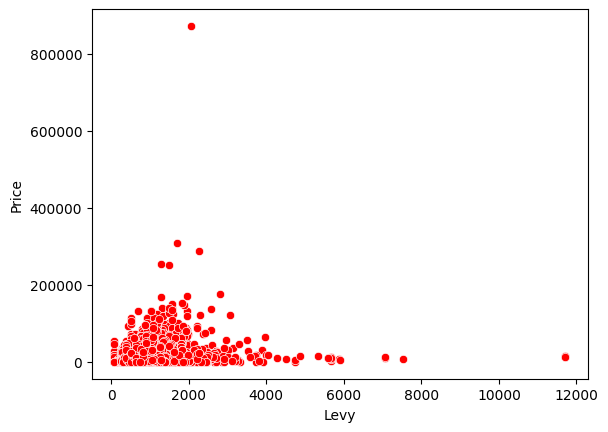

In [15]:
sns.scatterplot(data=df, x="Levy", y="Price", color='r')

Text(0.5, 1.0, '# of each Category')

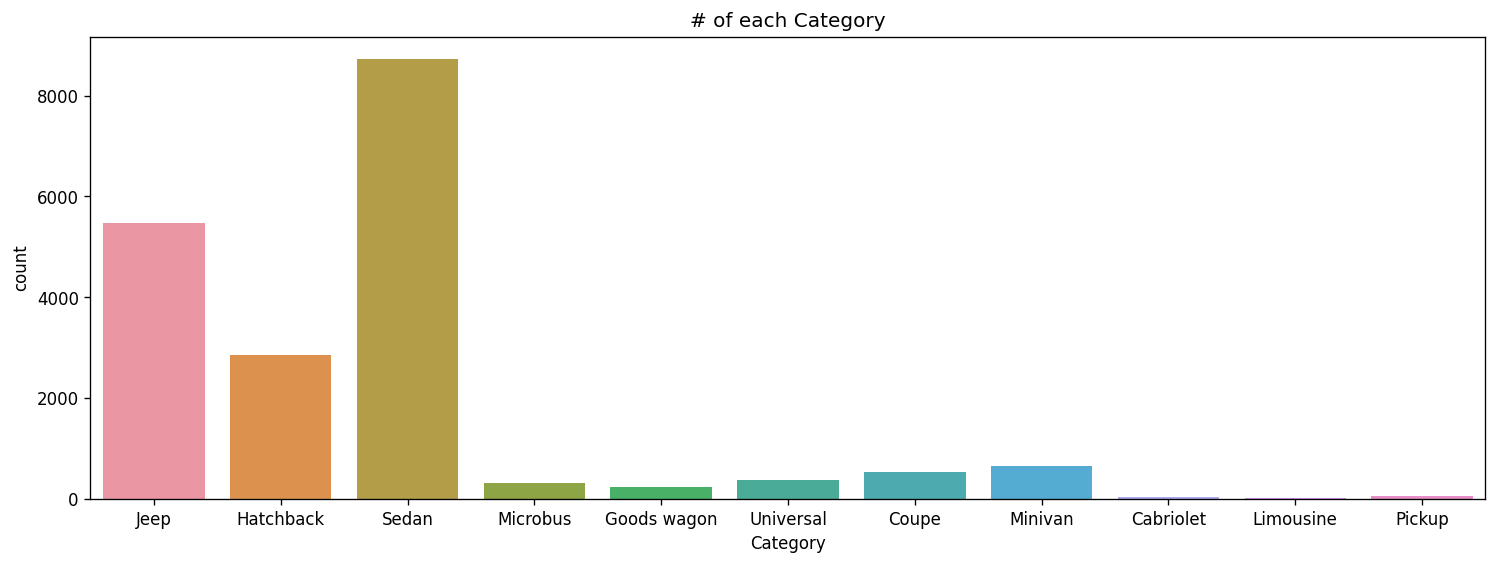

In [16]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Category')
plt.title("# of each Category")

C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\99089866.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Airbags'], color='b', shade=True)


<AxesSubplot: xlabel='Airbags', ylabel='Density'>

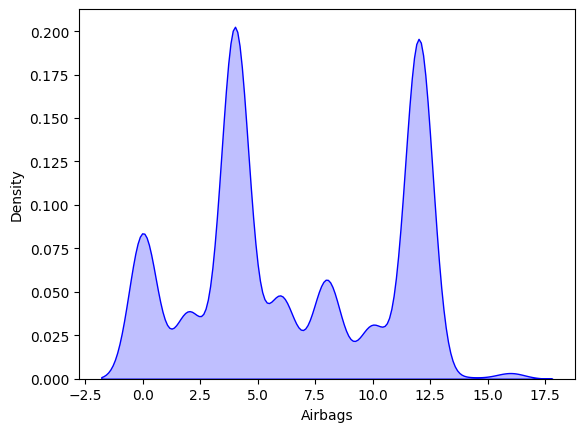

In [17]:
sns.kdeplot(df['Airbags'], color='b', shade=True)

<AxesSubplot: xlabel='Prod. year', ylabel='Count'>

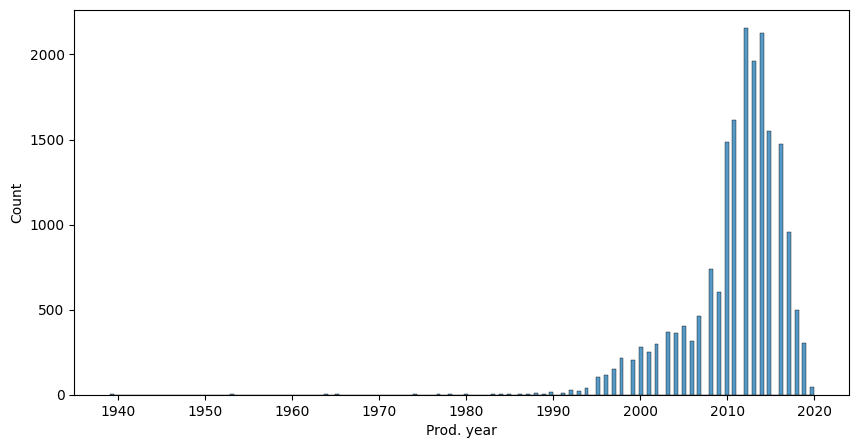

In [18]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\4031154114.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Engine volume'], shade = True)


<AxesSubplot: xlabel='Engine volume', ylabel='Density'>

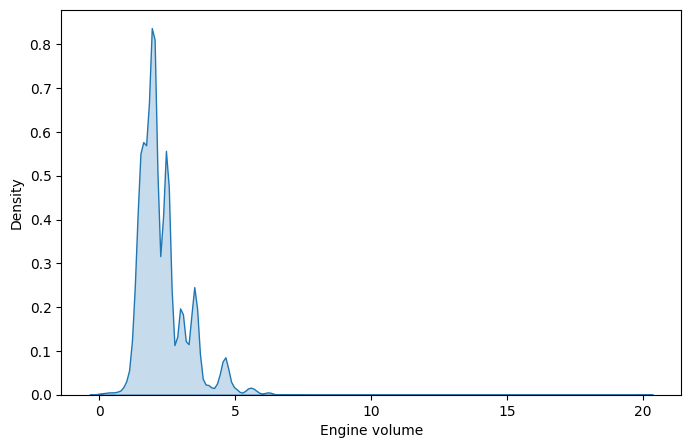

In [19]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Engine volume'], shade = True)

Text(0.5, 1.0, '# of colors')

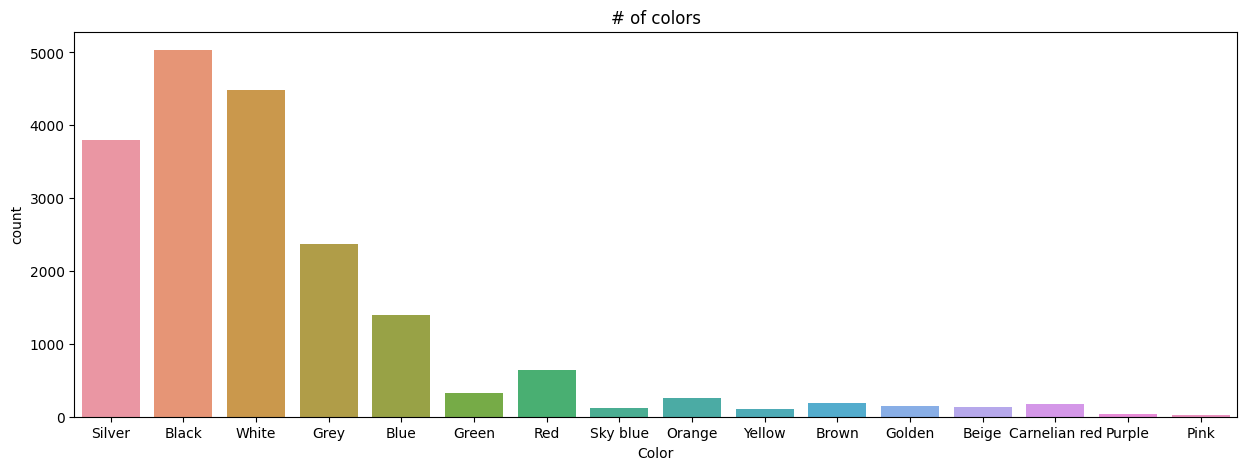

In [20]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(data=df, x='Color')
plt.title("# of colors")

<AxesSubplot: xlabel='Doors', ylabel='count'>

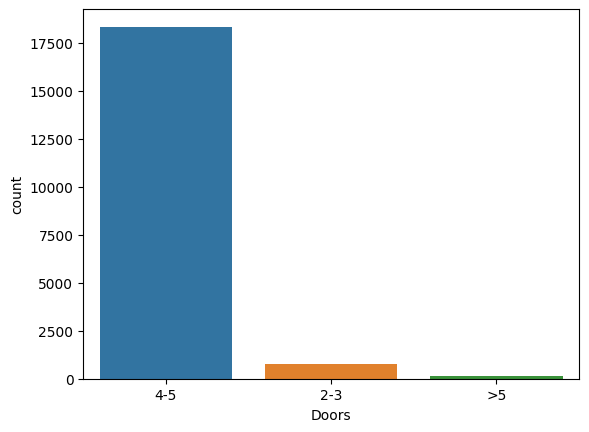

In [21]:
sns.countplot(data=df, x='Doors')

## Continue Data Cleaning

In [22]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

***Drop Duplicates***

In [23]:
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

***Reset Index***

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15725 entries, 0 to 15724
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15725 non-null  int64  
 1   Levy              10041 non-null  float64
 2   Manufacturer      15725 non-null  object 
 3   Model             15725 non-null  object 
 4   Prod. year        15725 non-null  int64  
 5   Category          15725 non-null  object 
 6   Leather interior  15725 non-null  object 
 7   Fuel type         15725 non-null  object 
 8   Engine volume     15725 non-null  float64
 9   Mileage           15725 non-null  float64
 10  Cylinders         15725 non-null  float64
 11  Gear box type     15725 non-null  object 
 12  Drive wheels      15725 non-null  object 
 13  Doors             15725 non-null  object 
 14  Wheel             15725 non-null  object 
 15  Color             15725 non-null  object 
 16  Airbags           15725 non-null  int64 

***Explore data***

***1. Levy has null***

<AxesSubplot: >

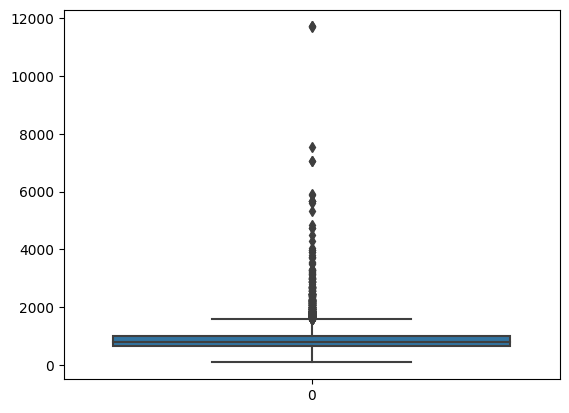

In [25]:
sns.boxplot(df['Levy'])

***Explore Levy***

***Decition to fillna of 'Levy' with Median***

In [26]:
df['Levy'].fillna(df['Levy'].median(), inplace=True)

***Fill null in 'Levy' with median***

In [27]:
outlier_features = df.select_dtypes("number").columns
for feature in outlier_features:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)


  for i in range(df.shape[0]):
          if df[feature][i] < lower_bound:
              df[feature][i] = None
          elif df[feature][i] > upper_bound:
              df[feature][i] = None

df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\1702768698.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][i] = None
C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\1702768698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][i] = None


C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\2653291050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower = pd.DataFrame(np.tril(df.corr(), -1), columns=df.corr().columns)


<AxesSubplot: >

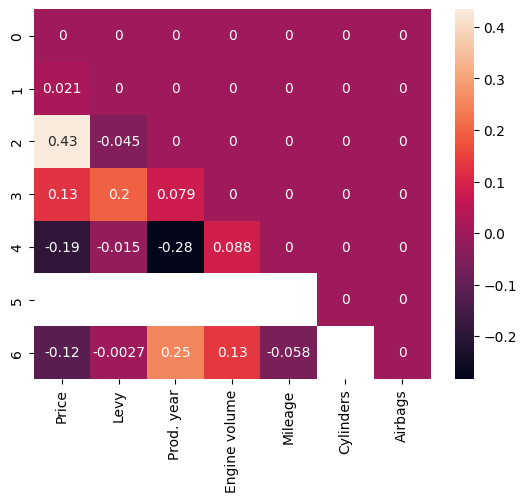

In [28]:
lower = pd.DataFrame(np.tril(df.corr(), -1), columns=df.corr().columns)
sns.heatmap(lower, annot=True)

In [29]:
df.drop(columns=["Cylinders"], inplace=True)

***Drop 'Cylinderes'***

***Data in Cylinderes is all same (data=4) so -> drop it***

In [30]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

***Select columns that type is object***

***then do LabelEncoder***

In [31]:
df.describe()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.00000,8401.000000,8401.000000,8401.000000
mean,16396.422093,761.684204,26.385430,442.448161,2011.140340,5.758124,0.622783,2.897155,1.926794,126496.386740,0.611356,0.965599,0.97286,0.104988,8.240924,6.256993
std,10976.184836,94.999035,13.590035,215.138904,4.468242,2.333618,0.484719,1.333146,0.358110,73420.088309,0.970154,0.396271,0.19875,0.306556,5.259893,3.802570
min,1.000000,574.000000,0.000000,0.000000,1999.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,8467.000000,707.000000,18.000000,268.000000,2009.000000,4.000000,0.000000,2.000000,1.600000,71886.000000,0.000000,1.000000,1.00000,0.000000,2.000000,4.000000
50%,15323.000000,779.000000,22.000000,448.000000,2012.000000,6.000000,1.000000,4.000000,2.000000,122000.000000,0.000000,1.000000,1.00000,0.000000,11.000000,4.000000
75%,21972.000000,779.000000,42.000000,632.000000,2014.000000,8.000000,1.000000,4.000000,2.000000,172125.000000,1.000000,1.000000,1.00000,0.000000,13.000000,10.000000
max,47107.000000,1036.000000,49.000000,827.000000,2020.000000,9.000000,1.000000,5.000000,3.600000,350070.000000,3.000000,2.000000,2.00000,1.000000,15.000000,16.000000


## Continue Exploring Data Analysis

<AxesSubplot: xlabel='Levy', ylabel='Price'>

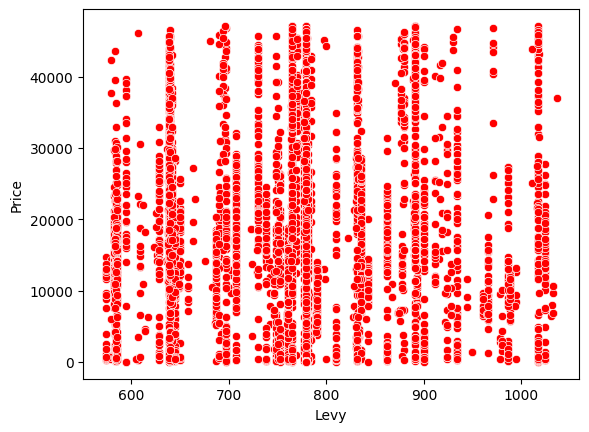

In [32]:
sns.scatterplot(data=df, x="Levy", y="Price", color='r')

<AxesSubplot: xlabel='Prod. year', ylabel='Count'>

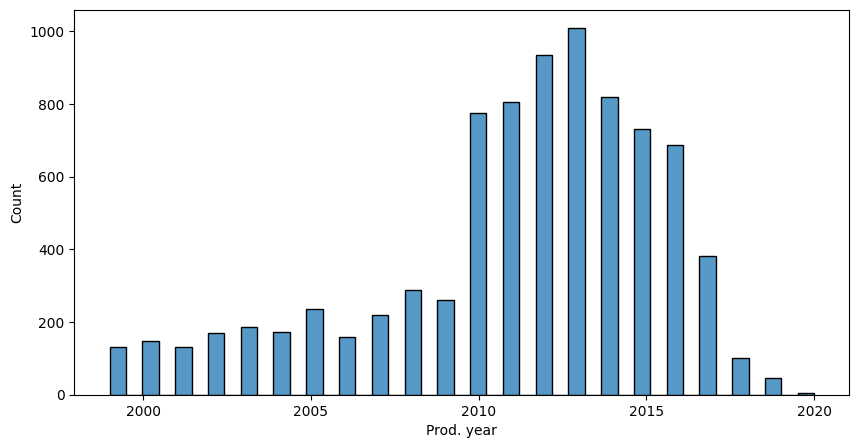

In [33]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\4031154114.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Engine volume'], shade = True)


<AxesSubplot: xlabel='Engine volume', ylabel='Density'>

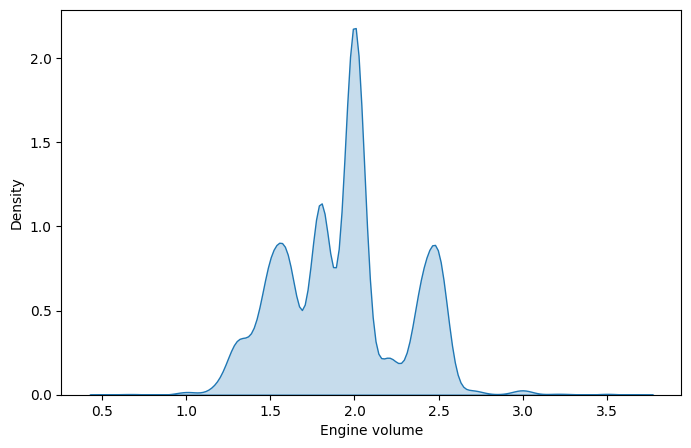

In [34]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Engine volume'], shade = True)

## Linear Regression

In [35]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,8467.0,779.0,17,340,2006.0,3,0,4,1.3,200000.0,3,1,1,1,1,2
1,3607.0,862.0,13,329,2011.0,4,1,2,2.5,168966.0,0,0,1,0,14,0
2,39493.0,891.0,18,655,2016.0,4,1,1,2.0,160931.0,0,1,1,0,14,4
3,1803.0,761.0,44,595,2010.0,3,1,2,1.8,258909.0,0,1,1,0,14,12
4,549.0,751.0,18,672,2013.0,8,1,4,2.4,216118.0,0,1,1,0,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8396,470.0,645.0,44,595,2011.0,3,1,2,1.8,307325.0,0,1,1,0,12,12
8397,8467.0,779.0,28,174,1999.0,1,1,0,2.0,300000.0,1,2,0,0,12,5
8398,15681.0,831.0,18,672,2011.0,8,1,4,2.4,161600.0,2,1,1,0,11,8
8399,26108.0,836.0,18,745,2010.0,4,1,1,2.0,116365.0,0,1,1,0,7,4


In [36]:
# Split Data -> MinMaxScale -> Train_Test_Spilt

y = df.iloc[:, 0:1]
x = df.drop(['Price'], axis=1)
x = MinMaxScaler().fit_transform(x)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)


In [37]:
# Train -> r2 -> reset_index -> trasform y_pred to list

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2 = r2_score(y_test,y_pred)
print("RSquare : ", r2)

# Reset index
y_test.reset_index(inplace=True)

# Transform y_pred
y_pred = [pred[0] for pred in y_pred]

RSquare :  0.3380858434355657


In [38]:
# Create new DataFraom for collect

prediction = y_test
prediction['Price_predict'] = pd.DataFrame(y_pred)
print(prediction)

      index    Price  Price_predict
0      4067   2587.0   12464.697838
1       681  10976.0    4742.190156
2        21   1411.0   21360.319874
3      1309  35902.0   27244.102897
4      8060  17942.0   22281.151427
...     ...      ...            ...
2516   7135  15900.0   14344.168467
2517   4046  23521.0   14016.672323
2518   8304   7527.0   16995.469339
2519   7161   9722.0   17765.002873
2520   2854  21012.0   15529.657472

[2521 rows x 3 columns]


In [39]:
# Find error_distance

distance = []
for i in range(prediction.shape[0]):
  distance.append(abs(prediction['Price'][i] - prediction['Price_predict'][i]))

prediction['distance'] = pd.DataFrame(distance)
print(prediction)


      index    Price  Price_predict      distance
0      4067   2587.0   12464.697838   9877.697838
1       681  10976.0    4742.190156   6233.809844
2        21   1411.0   21360.319874  19949.319874
3      1309  35902.0   27244.102897   8657.897103
4      8060  17942.0   22281.151427   4339.151427
...     ...      ...            ...           ...
2516   7135  15900.0   14344.168467   1555.831533
2517   4046  23521.0   14016.672323   9504.327677
2518   8304   7527.0   16995.469339   9468.469339
2519   7161   9722.0   17765.002873   8043.002873
2520   2854  21012.0   15529.657472   5482.342528

[2521 rows x 4 columns]


In [40]:
# Get top 10 error_distance
# By find index -> sort -> get top 10 -> get index of top 10 error

distance_with_id = [(i, distance[i]) for i in range(len(distance))]
sort_distance = sorted(distance_with_id, reverse=True, key=lambda x: x[1])
top_10_errors = [error[0] for error in sort_distance[:10]]
top_10_accurate = [error[0] for error in sort_distance[len(sort_distance):len(sort_distance)-10:-1]]
print("Top 10 errors index : ", top_10_errors)
print("Top 10 accurate index : ", top_10_accurate)

Top 10 errors index :  [1710, 498, 473, 1270, 982, 1402, 1881, 842, 678, 2057]
Top 10 accurate index :  [2001, 2242, 1527, 919, 173, 1360, 979, 721, 450]


In [41]:
# Filter top 10 error from df

top_10_errors = pd.DataFrame(df, index=top_10_errors)
top_10_errors

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1710,25889.0,730.0,18,310,2016.0,8,1,4,1.6,63276.0,0,1,1,0,14,4
498,6586.0,779.0,31,558,2003.0,4,0,0,2.4,156564.0,0,0,1,0,2,4
473,12513.0,769.0,22,218,2011.0,6,1,1,2.2,100842.0,0,1,1,0,14,4
1270,3293.0,586.0,17,228,2012.0,8,1,4,1.8,124509.0,0,1,1,0,14,12
982,14740.0,779.0,44,595,2008.0,3,1,2,1.5,193000.0,0,1,1,0,12,12
1402,18189.0,769.0,6,215,2011.0,4,1,1,2.2,70479.0,0,1,1,0,7,4
1881,36827.0,640.0,18,655,2013.0,4,1,1,2.0,171755.0,0,1,1,0,12,4
842,23521.0,779.0,44,595,2013.0,3,0,2,1.8,169600.0,0,1,1,0,12,4
678,20636.0,640.0,18,745,2013.0,4,1,1,2.0,64259.0,0,1,1,0,7,4
2057,22580.0,749.0,22,548,2014.0,8,1,4,2.4,47000.0,2,1,1,0,1,6


In [42]:
top_10_accurate = pd.DataFrame(df, index=top_10_accurate)
top_10_accurate

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2001,941.0,584.0,18,310,2014.0,8,1,4,1.8,101526.0,0,1,1,0,12,12
2242,45.0,779.0,17,340,2007.0,3,0,4,1.3,87000.0,0,1,1,1,1,5
1527,31248.0,751.0,21,240,2013.0,4,1,4,2.4,59897.0,0,1,1,0,14,4
919,4234.0,779.0,44,200,2013.0,8,1,2,2.5,26918.0,0,1,1,0,14,12
173,37000.0,891.0,18,745,2016.0,4,1,1,2.0,80000.0,0,1,1,0,12,4
1360,11917.0,779.0,44,595,2007.0,8,0,2,1.5,318400.0,0,1,1,0,13,5
979,39750.0,730.0,41,91,2016.0,4,1,1,1.6,72000.0,0,1,1,0,11,4
721,8000.0,779.0,31,233,2006.0,3,0,4,1.5,169969.0,0,1,1,1,12,2
450,10036.0,779.0,3,31,2002.0,8,0,1,2.0,280000.0,1,2,1,0,1,8


## SVR lin


In [43]:
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import metrics
Num_fold = 3
Seed = 20
kfold = model_selection.KFold(n_splits=Num_fold, shuffle = True, random_state=Seed)
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)

In [44]:
x_train_SVRlin, x_test_SVRlin, y_train_SVRlin, y_test_SVRlin = train_test_split(x, y, test_size=0.3, random_state=5)

In [45]:
score_lin = model_selection.cross_val_score(svr_lin, x_train_SVRlin, y_train_SVRlin, cv=kfold)

c:\Users\nuch2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nuch2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nuch2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
SVR_Linear = svr_lin.fit(x_train_SVRlin,y_train_SVRlin).predict(x_test_SVRlin)
SVR_Linear

c:\Users\nuch2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([15858.9486172 ,  8077.73457876, 19304.45274283, ...,
       17663.22330759, 17978.40684307, 16895.31581562])

In [47]:
SVR_linear_r2 = metrics.r2_score(y_test_SVRlin, SVR_Linear)
SVR_linear_r2

0.28683880775136306

## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
rating_pctile = np.percentile( y, [25,50,75])
priceRange = []
NSamples = [0,0,0,0]
for i in y.values:
    if i < rating_pctile [0]: #25 percentile
        NSamples[0] += 1
        priceRange.append(1)
    if rating_pctile [0] <= i < rating_pctile [1]: # 50 percentile
        NSamples[1] += 1
        priceRange.append(2)
    if rating_pctile [1] <= i < rating_pctile [2]: # 75 percentile
        NSamples[2] += 1
        priceRange.append(3)
    if i >= rating_pctile[2]:
        NSamples[3] += 1
        priceRange.append(4) 
y["Price"] = priceRange


In [50]:
x_trainKNN, x_testKNN, y_trainKNN, y_testKNN = train_test_split(x, y, test_size=0.3, random_state=5)

In [51]:
modelKNN = KNeighborsClassifier(n_neighbors=5, p=2)
modelKNN.fit(x_trainKNN,y_trainKNN)

c:\Users\nuch2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [52]:
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix)
y_predKNN = modelKNN.predict(x_testKNN)
KNNScore = accuracy_score(y_testKNN, y_predKNN)
KNNScore

0.6148353827846093

In [53]:
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN, y_predKNN))
print('Classification Report: ')
print(classification_report(y_testKNN, y_predKNN))

Confusion Matrix: 
[[479 106  46  23]
 [109 346 143  19]
 [ 63 141 326  99]
 [ 43  41 138 399]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       654
           2       0.55      0.56      0.55       617
           3       0.50      0.52      0.51       629
           4       0.74      0.64      0.69       621

    accuracy                           0.61      2521
   macro avg       0.62      0.61      0.61      2521
weighted avg       0.62      0.61      0.62      2521



## Decision Tree

In [54]:
from sklearn.ensemble import RandomForestClassifier
ASM_function = ['entropy', 'gini']
maxD = [4, 5, 6, None]

In [55]:
ModelDT1 = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth = 4 )
ModelDT2 = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth = 5 )
ModelDT3 = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 4 )
ModelDT4 = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth = 5 )
ModelDT1.fit(x_trainKNN,y_trainKNN)
ModelDT2.fit(x_trainKNN,y_trainKNN)
ModelDT3.fit(x_trainKNN,y_trainKNN)
ModelDT4.fit(x_trainKNN,y_trainKNN)

DecisionTreeClassifier(max_depth=5)

In [56]:
y_pred1 = ModelDT1.predict(x_testKNN)
DTScore1 = accuracy_score(y_testKNN, y_pred1)
print(DTScore1)

0.5624752082506942


In [57]:
y_pred2 = ModelDT2.predict(x_testKNN)
DTScore2 = accuracy_score(y_testKNN, y_pred2)
print(DTScore2)

0.5834986116620389


In [58]:
y_pred3 = ModelDT3.predict(x_testKNN)
DTScore3 = accuracy_score(y_testKNN, y_pred3)
print(DTScore3)

0.5513685045616818


In [59]:
y_pred4 = ModelDT4.predict(x_testKNN)
DTScore4 = accuracy_score(y_testKNN, y_pred4)
print(DTScore4)

0.6005553351844506


In [60]:
# Print Confusion Matrix and Classification Report for best k
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN, y_pred2))
print('Classification Report: ')
print(classification_report(y_testKNN, y_pred2))

Confusion Matrix: 
[[467 107  73   7]
 [ 89 230 278  20]
 [ 48  40 441 100]
 [ 35  18 235 333]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.73      0.71      0.72       654
           2       0.58      0.37      0.45       617
           3       0.43      0.70      0.53       629
           4       0.72      0.54      0.62       621

    accuracy                           0.58      2521
   macro avg       0.62      0.58      0.58      2521
weighted avg       0.62      0.58      0.58      2521



## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
ASM_function = ['entropy','gini']
nEstimator = 100 
nJob = 2
rState = 10

In [62]:
RandomF = RandomForestClassifier(criterion = 'entropy',n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
RandomF1 = RandomForestClassifier(criterion = 'gini',n_estimators=nEstimator,n_jobs=nJob,random_state=rState)
RandomF.fit(x_trainKNN,y_trainKNN)
RandomF1.fit(x_trainKNN,y_trainKNN)

C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\1289516863.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomF.fit(x_trainKNN,y_trainKNN)
C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\1289516863.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomF1.fit(x_trainKNN,y_trainKNN)


RandomForestClassifier(n_jobs=2, random_state=10)

In [63]:
#Model Testing
y_predRF1 = RandomF.predict(x_testKNN)
RFScore1 = accuracy_score(y_testKNN,y_predRF1)
RFScore1

0.7140023800079334

In [64]:
y_predRF2 = RandomF1.predict(x_testKNN)
RFScore2 = accuracy_score(y_testKNN,y_predRF2)
RFScore2

0.7151923839746133

In [65]:
#print confusion matrix and classification report for best k
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN,y_predRF1))
print('Classification Report: ')
print(classification_report(y_testKNN,y_predRF1))

Confusion Matrix: 
[[528  86  21  19]
 [ 94 394 118  11]
 [ 29  98 419  83]
 [ 27  17 118 459]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.78      0.81      0.79       654
           2       0.66      0.64      0.65       617
           3       0.62      0.67      0.64       629
           4       0.80      0.74      0.77       621

    accuracy                           0.71      2521
   macro avg       0.72      0.71      0.71      2521
weighted avg       0.72      0.71      0.71      2521



## GridSearch Classification

In [66]:
from sklearn.model_selection import GridSearchCV
classification = {'KNN':KNeighborsClassifier(),'DT':DecisionTreeClassifier(),'RF':RandomForestClassifier()}

In [67]:
#Create Parameter Dicitonary for KNN
K_list = [1,3,5,7,9,11,13,15,17,19,21,23,35,45]
KNN_param = dict(n_neighbors = K_list)
KNN_param

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 35, 45]}

In [68]:
#Create Parameter Dictionary for Decision Tree
ASM_function = ['entropy','gini','log_loss']
maxD = [4,5,6,None]
maxF =['auto','log2',None,'sqrt']
minSample = [1,2,4]
DT_param = dict(criterion = ASM_function,max_depth = maxD,min_samples_leaf = minSample,max_features = maxF)

In [69]:
#Create Parameter Dictionary for Random Forest
nEst = [10,30,50,100]
RF_param = dict(n_estimators = nEst,criterion = ASM_function,max_depth = maxD,min_samples_leaf= minSample,max_features = maxF)

In [70]:
for EST in classification:
    model = classification[EST]
    if EST == 'KNN':
        param = KNN_param
    elif EST == 'DT':
        param = DT_param
    else:
        param = RF_param
    grid = GridSearchCV(estimator = model,
                        n_jobs=8,
                        verbose=10,
                        scoring='accuracy',
                        cv=5,
                        param_grid=param)
    grid_result = grid.fit(x_trainKNN,y_trainKNN)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\nuch2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Users\nuch2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [71]:
# Show Best Parameters 
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}
Best score:  0.7117346938775511


In [72]:
RandomF1 = RandomForestClassifier(n_estimators = 100,criterion = 'gini',max_depth = None,min_samples_leaf= 2,max_features = 'log2')

In [73]:
RandomF1.fit(x_trainKNN,y_trainKNN)

C:\Users\nuch2\AppData\Local\Temp\ipykernel_5624\1180084693.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomF1.fit(x_trainKNN,y_trainKNN)


RandomForestClassifier(max_features='log2', min_samples_leaf=2)

In [74]:
#Model Testing
y_predRF = RandomF1.predict(x_testKNN)
RFScore = accuracy_score(y_testKNN,y_predRF)
RFScore

0.7175723919079731

In [75]:
#print confusion matrix and classification report for best k
print('Confusion Matrix: ')
print(confusion_matrix(y_testKNN,y_predRF))
print('Classification Report: ')
print(classification_report(y_testKNN,y_predRF))

Confusion Matrix: 
[[520  86  26  22]
 [ 95 392 118  12]
 [ 27  84 429  89]
 [ 27  17 109 468]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.78      0.80      0.79       654
           2       0.68      0.64      0.66       617
           3       0.63      0.68      0.65       629
           4       0.79      0.75      0.77       621

    accuracy                           0.72      2521
   macro avg       0.72      0.72      0.72      2521
weighted avg       0.72      0.72      0.72      2521

